In [1]:
import torch
from torchvision import transforms
from ClassComp.data_utils.loaders import get_mnist, get_dataloader
from ClassComp.experiments.train import train_binary_classifier, train_vae


In [2]:
torch.cuda.is_available()

True

### Error analysis

2HR

In [4]:
from ClassComp.experiments.error_analysis import error_analysis
import pickle
import copy

def update_running_average(results, cumulative_sums, counts):
    """
    Update the running average of the results in the dictionary.

    Args:
        results (dict): The dictionary containing the current results.
        cumulative_sums (dict): The dictionary storing cumulative sums of values.
        counts (int): The current count of iterations.

    Returns:
        dict: The updated running averages.
    """
    # Update cumulative sums and counts
    for key, values in results.items():
        if key not in cumulative_sums:
            cumulative_sums[key] = [0.0] * len(values)  # Initialize sums if not present
        
        # Update cumulative sums
        for i in range(len(values)):
            cumulative_sums[key][i] += values[i]
    
    # Compute running averages
    running_averages = {}
    for key, sums in cumulative_sums.items():
        running_averages[key] = [s / counts for s in sums]
    
    return running_averages

# Example usage
n_runs = 10  # Number of runs
cumulative_sums = {}
counts = 0
final_averages = {}

for _ in range(n_runs):
    # Simulate running the function
    results = error_analysis(
        [-1, 1],
        10,
        dataset_size=3,
        image_size=32,
        batch_size=4,
        seed=counts + 1,
    )
    counts += 1
    final_averages = update_running_average(results, cumulative_sums, counts)

print("Final Averages:", final_averages)



Training VGG


Epoch [1/5], Loss: 0.7723, Training Accuracy: 66.67%, Time: 0.22s, Gradient Norm: 494.3587
Validation Accuracy: 51.67%


Epoch [2/5], Loss: 2.0466, Training Accuracy: 66.67%, Time: 0.07s, Gradient Norm: 137.9007


Validation Accuracy: 51.67%


Epoch [3/5], Loss: 1.4717, Training Accuracy: 66.67%, Time: 0.06s, Gradient Norm: 63.9393


Validation Accuracy: 51.67%


Epoch [4/5], Loss: 0.4722, Training Accuracy: 66.67%, Time: 0.08s, Gradient Norm: 21.0624


Validation Accuracy: 51.67%


Epoch [5/5], Loss: 0.3942, Training Accuracy: 100.00%, Time: 0.06s, Gradient Norm: 38.1760


Validation Accuracy: 51.67%
Training ResNet


Epoch [1/5], Loss: 0.8245, Training Accuracy: 33.33%, Time: 0.10s, Gradient Norm: 338.2913
Validation Accuracy: 51.67%


Epoch [2/5], Loss: 1.9692, Training Accuracy: 66.67%, Time: 0.08s, Gradient Norm: 275.7073


Validation Accuracy: 51.67%


Epoch [3/5], Loss: 0.9955, Training Accuracy: 66.67%, Time: 0.08s, Gradient Norm: 171.0820


Validation Accuracy: 48.33%


Epoch [4/5], Loss: 0.1394, Training Accuracy: 100.00%, Time: 0.08s, Gradient Norm: 60.9864


Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.0160, Training Accuracy: 100.00%, Time: 0.08s, Gradient Norm: 9.3392


Validation Accuracy: 100.00%
Training UNet


Epoch [1/5], Loss: 0.6575, Training Accuracy: 66.67%, Time: 0.17s, Gradient Norm: 5.9391
Validation Accuracy: 95.67%


Epoch [2/5], Loss: 0.2885, Training Accuracy: 100.00%, Time: 0.06s, Gradient Norm: 2.5626


Validation Accuracy: 94.33%


Epoch [3/5], Loss: 0.1879, Training Accuracy: 100.00%, Time: 0.06s, Gradient Norm: 1.4056


Validation Accuracy: 93.67%


Epoch [4/5], Loss: 0.1539, Training Accuracy: 100.00%, Time: 0.07s, Gradient Norm: 1.0458


Validation Accuracy: 93.33%


Epoch [5/5], Loss: 0.1372, Training Accuracy: 100.00%, Time: 0.07s, Gradient Norm: 0.8983


Validation Accuracy: 93.33%


Epoch [1/5], Loss: 0.6197, Training Accuracy: 66.67%, Time: 0.11s, Gradient Norm: 8.3579
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 0.1865, Training Accuracy: 100.00%, Time: 0.11s, Gradient Norm: 2.1364


Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.1132, Training Accuracy: 100.00%, Time: 0.07s, Gradient Norm: 1.0263


Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.0921, Training Accuracy: 100.00%, Time: 0.08s, Gradient Norm: 0.7299


Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.0816, Training Accuracy: 100.00%, Time: 0.07s, Gradient Norm: 0.6190


Validation Accuracy: 100.00%
Training VAE


Epoch [1/5], Training Loss: 130163.9453, Reconstruction Loss: 130163.6719, KLD Loss: 5.4856, Time: 0.23s, Gradient Norm: 2.7216
Epoch [1/5], Validation Loss: 172082.1077, Validation Recon: 172077.2317, Validation KLD: 97.5397


Epoch [2/5], Training Loss: 127601.7578, Reconstruction Loss: 127548.3750, KLD Loss: 1067.6653, Time: 0.02s, Gradient Norm: 2.2975


Epoch [2/5], Validation Loss: 171848.7879, Validation Recon: 171744.3390, Validation KLD: 2088.9758


Epoch [3/5], Training Loss: 1777852032.0000, Reconstruction Loss: 123083.4453, KLD Loss: 35554578432.0000, Time: 0.02s, Gradient Norm: 1.5197


Epoch [3/5], Validation Loss: 171942.6969, Validation Recon: 171852.7275, Validation KLD: 1799.3863


Epoch [4/5], Training Loss: 2735045083136.0000, Reconstruction Loss: 122773.9062, KLD Loss: 54700900614144.0000, Time: 0.02s, Gradient Norm: 1.4990


Epoch [4/5], Validation Loss: 171956.2831, Validation Recon: 171899.2450, Validation KLD: 1140.7719


Epoch [5/5], Training Loss: 116191568.0000, Reconstruction Loss: 122200.0469, KLD Loss: 2321387264.0000, Time: 0.02s, Gradient Norm: 1.4871


Epoch [5/5], Validation Loss: 171999.8994, Validation Recon: 171941.5544, Validation KLD: 1166.9113


Epoch [1/5], Loss: 4.6341, Training Accuracy: 100.00%, Time: 0.06s, Gradient Norm: 16.8110


Validation Accuracy: 52.00%


Epoch [2/5], Loss: 369.2070, Training Accuracy: 66.67%, Time: 0.01s, Gradient Norm: 1763.2090
Validation Accuracy: 52.00%


Epoch [3/5], Loss: 58.0905, Training Accuracy: 66.67%, Time: 0.01s, Gradient Norm: 223.1770


Validation Accuracy: 52.67%


Epoch [4/5], Loss: 1.9373, Training Accuracy: 100.00%, Time: 0.02s, Gradient Norm: 10.9497
Validation Accuracy: 52.00%


Epoch [5/5], Loss: 125.0816, Training Accuracy: 66.67%, Time: 0.01s, Gradient Norm: 396.2452


Validation Accuracy: 52.00%
0.5166666666666667
Kmeans saved to results/models/VAE_synthetic_0x7f2f611f4ec0_kmeans.pkl
Training VGG


Epoch [1/5], Loss: 1.3542, Training Accuracy: 65.00%, Time: 3.83s, Gradient Norm: 64.4332
Validation Accuracy: 94.67%


Epoch [2/5], Loss: 0.9928, Training Accuracy: 66.67%, Time: 3.99s, Gradient Norm: 22.0576
Validation Accuracy: 48.67%


Epoch [3/5], Loss: 1.9995, Training Accuracy: 60.33%, Time: 4.00s, Gradient Norm: 76.1509
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.7377, Training Accuracy: 75.00%, Time: 3.98s, Gradient Norm: 20.6334
Validation Accuracy: 91.33%


Epoch [5/5], Loss: 0.6260, Training Accuracy: 85.00%, Time: 4.15s, Gradient Norm: 17.6098
Validation Accuracy: 100.00%
Training ResNet


Epoch [1/5], Loss: 1.7098, Training Accuracy: 89.00%, Time: 4.97s, Gradient Norm: 68.1021
Validation Accuracy: 100.00%


Epoch [2/5], Loss: 2.2971, Training Accuracy: 90.67%, Time: 4.65s, Gradient Norm: 54.0412
Validation Accuracy: 90.33%


Epoch [3/5], Loss: 0.6985, Training Accuracy: 96.00%, Time: 4.46s, Gradient Norm: 21.1305
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.8874, Training Accuracy: 94.00%, Time: 3.80s, Gradient Norm: 27.5625
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 1.1029, Training Accuracy: 96.33%, Time: 3.96s, Gradient Norm: 19.8405
Validation Accuracy: 100.00%
Training UNet


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:164: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet.load_state_dict(torch.load(resnet_path))


Epoch [1/5], Loss: 0.1841, Training Accuracy: 94.67%, Time: 4.37s, Gradient Norm: 1.1118
Validation Accuracy: 95.67%


Epoch [2/5], Loss: 0.1196, Training Accuracy: 96.33%, Time: 4.70s, Gradient Norm: 0.7486
Validation Accuracy: 95.67%


Epoch [3/5], Loss: 0.1049, Training Accuracy: 96.00%, Time: 4.96s, Gradient Norm: 0.6603
Validation Accuracy: 94.33%


Epoch [4/5], Loss: 0.0911, Training Accuracy: 96.67%, Time: 4.80s, Gradient Norm: 0.5786
Validation Accuracy: 93.33%


Epoch [5/5], Loss: 0.0863, Training Accuracy: 95.67%, Time: 4.89s, Gradient Norm: 0.5463
Validation Accuracy: 94.33%


Epoch [1/5], Loss: 0.1620, Training Accuracy: 94.33%, Time: 6.01s, Gradient Norm: 1.3311
Validation Accuracy: 48.33%


Epoch [2/5], Loss: 0.1103, Training Accuracy: 95.33%, Time: 6.26s, Gradient Norm: 0.8066
Validation Accuracy: 100.00%


Epoch [3/5], Loss: 0.0922, Training Accuracy: 97.00%, Time: 6.04s, Gradient Norm: 0.6635
Validation Accuracy: 100.00%


Epoch [4/5], Loss: 0.0910, Training Accuracy: 95.67%, Time: 6.18s, Gradient Norm: 0.6703
Validation Accuracy: 100.00%


Epoch [5/5], Loss: 0.0850, Training Accuracy: 96.00%, Time: 5.85s, Gradient Norm: 0.6028
Validation Accuracy: 100.00%
Training VAE


Epoch [1/5], Training Loss: 167140.5254, Reconstruction Loss: 167098.8942, KLD Loss: 832.6361, Time: 1.46s, Gradient Norm: 1.8796
Epoch [1/5], Validation Loss: 166030.3500, Validation Recon: 166018.9396, Validation KLD: 228.2020


Epoch [2/5], Training Loss: 165693.1104, Reconstruction Loss: 165673.0717, KLD Loss: 400.7740, Time: 1.35s, Gradient Norm: 1.7588
Epoch [2/5], Validation Loss: 165475.0100, Validation Recon: 165445.3346, Validation KLD: 593.5052


Epoch [3/5], Training Loss: 165517.3821, Reconstruction Loss: 165498.7704, KLD Loss: 372.2515, Time: 1.24s, Gradient Norm: 1.7240
Epoch [3/5], Validation Loss: 165427.2375, Validation Recon: 165411.7390, Validation KLD: 309.9619


Epoch [4/5], Training Loss: 165455.1969, Reconstruction Loss: 165439.9335, KLD Loss: 305.2782, Time: 1.19s, Gradient Norm: 1.7469
Epoch [4/5], Validation Loss: 165429.5150, Validation Recon: 165421.3879, Validation KLD: 162.5281


Epoch [5/5], Training Loss: 165393.9560, Reconstruction Loss: 165381.6067, KLD Loss: 246.9922, Time: 1.33s, Gradient Norm: 1.7789
Epoch [5/5], Validation Loss: 165358.3173, Validation Recon: 165342.7477, Validation KLD: 311.3989


Epoch [1/5], Loss: 2.5771, Training Accuracy: 98.00%, Time: 0.61s, Gradient Norm: 6.8558
Validation Accuracy: 98.33%


Epoch [2/5], Loss: 1.7270, Training Accuracy: 97.67%, Time: 0.66s, Gradient Norm: 6.6708
Validation Accuracy: 98.33%


Epoch [3/5], Loss: 0.9716, Training Accuracy: 98.33%, Time: 0.66s, Gradient Norm: 5.9025
Validation Accuracy: 97.67%


Epoch [4/5], Loss: 0.4884, Training Accuracy: 98.33%, Time: 0.72s, Gradient Norm: 5.0172
Validation Accuracy: 96.67%


Epoch [5/5], Loss: 0.2162, Training Accuracy: 94.67%, Time: 0.76s, Gradient Norm: 4.0197
Validation Accuracy: 92.33%
0.91
Kmeans saved to results/models/VAE_synthetic_0x7f2f611f5dc0_kmeans.pkl


/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:254: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  lhs = - (1 / sigma_0) * (x - mu_0).T @ (x - mu_0) + (1 / sigma_1) * (x - mu_1).T @ (x - mu_1)
/home/ymachta/ML_Model_Comparison/ClassComp/experiments/error_analysis.py:228: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value

Final Averages: {'VGG': [0.4833333333333333, 0.0], 'ResNet': [0.0, 0.0], 'UNet pretrained': [0.0, 0.0], 'UNet': [0.0, 0.0], 'VAE SVM': [0.42999999999999994, 0.053333333333333344], 'VAE KMeans': [0.3966666666666666, 0.08666666666666667]}


In [5]:
final_averages

{'VGG': [0.4833333333333333, 0.0],
 'ResNet': [0.0, 0.0],
 'UNet pretrained': [0.0, 0.0],
 'UNet': [0.0, 0.0],
 'VAE SVM': [0.42999999999999994, 0.053333333333333344],
 'VAE KMeans': [0.3966666666666666, 0.08666666666666667]}

In [4]:
import torch
def count_trainable_parameters(model: torch.nn.Module):
    """
    Returns the number of trainable parameters in the given PyTorch model.
    
    Args:
        model (torch.nn.Module): The PyTorch model for which we want to count the trainable parameters.
    
    Returns:
        int: The number of trainable parameters.
    """
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

VGG: 38924994
Resnet: 39363650
UNet: 40022850
VAE: 5273634


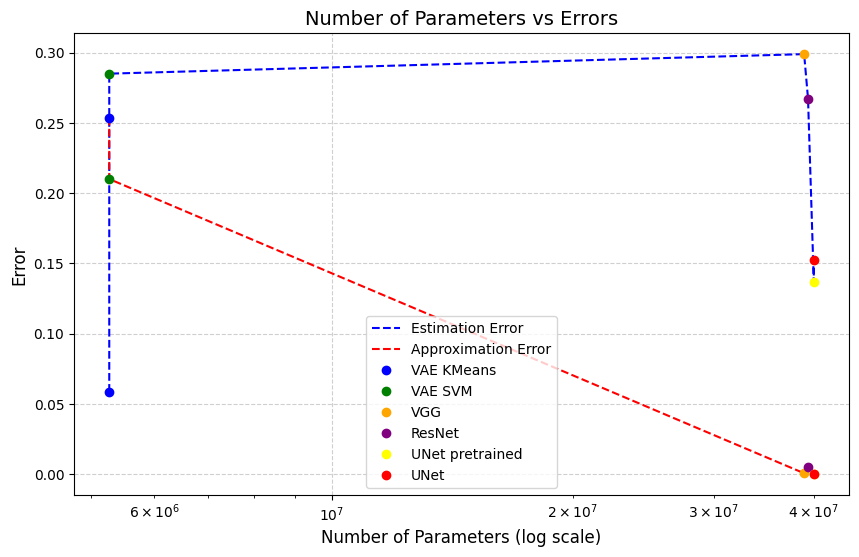

In [7]:
from ClassComp.models.vgg import VGG
from ClassComp.models.resnet import ResNet
from ClassComp.models.unet import UNet
from ClassComp.models.vae import VAE

vgg = VGG(32,1)
resnet = ResNet(32)
unet = UNet(32)
vae = VAE(32**2, 32**2, 8)

print(f"VGG: {count_trainable_parameters(vgg)}")
print(f"Resnet: {count_trainable_parameters(resnet)}")
print(f"UNet: {count_trainable_parameters(unet)}")
print(f"VAE: {count_trainable_parameters(vae)}")


import matplotlib.pyplot as plt

# Example data
errors = {
    'VAE KMeans': [0.0586, 0.2536],
    'VAE SVM': [0.2850000000000001, 0.20999999999999996],
    
    'VGG': [0.2989, 0.0006000000000000005],
    'ResNet': [0.2672, 0.005400000000000005],
    'UNet pretrained': [0.13679999999999998, 0.0],
    'UNet': [0.15259999999999999, 0.0],
    
}

parameters = {
    'VAE KMeans': count_trainable_parameters(vae) - 18,
    'VAE SVM': count_trainable_parameters(vae),
    
    'VGG': count_trainable_parameters(vgg),  # Replace with actual number of parameters
    'ResNet': count_trainable_parameters(resnet),
    'UNet pretrained': count_trainable_parameters(unet),
    'UNet': count_trainable_parameters(unet),
}

models = list(errors.keys())
param_values = [parameters[model] for model in models]
estimation_errors = [errors[model][0] for model in models]
approximation_errors = [errors[model][1] for model in models]

# Colors for each model
colors = ['blue', 'green', 'orange', 'purple', 'yellow', 'red']

# Plot
plt.figure(figsize=(10, 6))

plt.plot(param_values, estimation_errors, '--', label='Estimation Error', color='blue')
plt.plot(param_values, approximation_errors, '--', label='Approximation Error', color='red')


for i, model in enumerate(models):
    plt.plot(param_values[i], estimation_errors[i], 'o', color=colors[i], label=f'{model}')
    plt.plot(param_values[i], approximation_errors[i], 'o', color=colors[i])

# Add labels and title
plt.xlabel('Number of Parameters (log scale)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Number of Parameters vs Errors', fontsize=14)
plt.xscale('log')  # Use log scale for parameters
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10, loc='best')

# Show plot
# plt.savefig("results/image/tradeoff.png", bbox_inches="tight", dpi=300)
plt.show()

In [10]:
import os
os.makedirs("results/errors", exist_ok=True)
with open("results/errors/final_averages_our_models.pkl", "wb") as f:
    pickle.dump(final_averages, f)
    f.close()

In [11]:
with open("results/errors/final_averages_our_models.pkl", "rb") as f:
    d = pickle.load(f)
    f.close()
d

{'VGG': [0.24909999999999996, 0.001100000000000001],
 'ResNet': [0.2395, 0.00010000000000000009],
 'UNet pretrained': [0.2779, 0.0],
 'UNet': [0.12309999999999999, 0.0],
 'VAE SVM': [-0.1262, 0.6009999999999999],
 'VAE KMeans': [0.0764, 0.23570000000000002]}